<a href="https://www.kaggle.com/code/chiragb254/dimond-price-prediction-model-2?scriptVersionId=163158862" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Course: Big Data CBD 2214**

# **Assignment 1: Dimond Price Prediction -Group 1**


## **Submitted by:**

---

> * Chirag Bansal (C0908045)

> * Sahibpreet Singh (C0928040)

> * Balpreet Singh (C0924974)

> * Suril Purohit (C0928435)

# Business Case Evaluation
## Business Case Evaluation for Diamond Price Prediction

**Business Case Creation**
* **Justification and Motivation**

    The main motivation which helps us to choose predicting dimond prices is that it helps the diamond marchants with all the insights to take decisions in a better way. It helps the dimond traders, retailes and even the investors to optimize the price strategies.

* **Goals of the Analysis**
    * Predict Pricing: Provide stakeholders with accurate predictions of diamond pricing, enhancing competitiveness in the market.

    * Risk Mitigation: Identify the potential risks which may fluctuations the price of diamond, allowing stakeholders to manage and mitigate there risks and minimize the loss.

# Data Identification for Diamond Price Prediction
## Using Largest Diamond Price Dataset from Kaggle
* For our analysis, we use the largest diamond price dataset which is available on Kaggle. This dataset contains a complete information about dimond like `size ` , `color`, `min_price` and other wide range of information related to diamond. Using this dataset allows us to conduct various experiments to get a information about the factors that affecting the diamond prices.

# Data Acquisition and Filtering

* We use a single dataset for this assignment which we get from kaggle which contains `26 columns` and `219703 rows`.

# Importing Libraries

In [1]:
# importing all the important libraries which are required for this assignment
import pandas as pd  # to play with dataframe
import numpy as np  # to do some mathematical tasks like geting all the numarical datatypes
import matplotlib.pyplot as plt  # to plot the graphs
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns  # to plot some more complex graphs like pairplot
from sklearn.model_selection import train_test_split #  importing trains test split which we use in splitting our data
from sklearn.metrics import mean_squared_error as MSE # to calculate the squared mean error
from sklearn.metrics import r2_score, make_scorer # to calculate r2 score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler  # To get Encoded featuers for ordinal columns and Standard Scaler normalization


#  Importing different regression models to get the best accuracy
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import SGDRegressor, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,ElasticNet

# To ingnoring the warnings
import warnings
warnings.filterwarnings('ignore')


# Data Extraction

* Some of the data identified as input for the analysis may arrive in a format incompatible. Data Extraction lifecycle stage, is dedicated to extracting disparate data and transforming it into a format that the underlying Big Data solution.

***But in our case we are using a CSV file which doesn't have any compatibilty issue, so we doesn't required `data extraction` in this assignment.***

In [2]:
# Here we are using python's dataframe library Pandas to read the giver CSV file to perform oprations
# pd.read_csv function is used to read it where pd is pandas library and read_csv is function
df = pd.read_csv("/kaggle/input/the-largest-diamond-dataset-currely-on-kaggle/diamonds.csv")

In [3]:
# using .head() function to display the first 5 rows of the dataset on our dataframe variable 'df'
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [4]:
# Using .describe() method which is used to returns description of the data in the DataFrame
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [5]:
# Using .info method to prints the information or summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [6]:
#  It shows the shape of the dataset
df.shape

(219703, 26)

In [7]:
# Display all the columns of the dataset
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [8]:
# check null values in dataframe
df.isnull().values.any()

True

In [9]:
# It shows the sum of all null values in each column
df.isna().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

#### *as we see fluor_intensity has more that 60 percent of null values, so droping this column is a good practice*

In [10]:
#  Dropping the Unnamed and fluor_intensity column, unnamed because it is a serial number 
# so it doesn't provide any valuable information
df.drop(columns=['Unnamed: 0','fluor_intensity'],inplace=True)

In [11]:
#  Showing shape after droping the columns
df.shape

(219703, 24)

In [12]:
# Display's an int representing the number of elements in dataframe
df.size

5272872

In [13]:
# Here we are using the for loop to print the number of unique values of each column 
# using .unique() function
for col in df.columns:
    print(f'Column \033[1m{col}\033[0m has \033[1m{len(df[col].unique())}\033[0m values')

Column cut has 11 values
Column color has 11 values
Column clarity has 11 values
Column carat_weight has 878 values
Column cut_quality has 6 values
Column lab has 3 values
Column symmetry has 5 values
Column polish has 5 values
Column eye_clean has 5 values
Column culet_size has 9 values
Column culet_condition has 4 values
Column depth_percent has 534 values
Column table_percent has 235 values
Column meas_length has 1415 values
Column meas_width has 1155 values
Column meas_depth has 852 values
Column girdle_min has 10 values
Column girdle_max has 10 values
Column fluor_color has 6 values
Column fancy_color_dominant_color has 13 values
Column fancy_color_secondary_color has 11 values
Column fancy_color_overtone has 9 values
Column fancy_color_intensity has 10 values
Column total_sales_price has 22202 values


# DATA AGGREGATION AND REPRESENTATION

* Data may be spread across multiple datasets, requiring that datasets be joined together via common fields. But in our case we don't need Data aggregation but we need to convert our categorical data into numarical data and will normalize our data in next steps i.e Data Analysis and Data Visulization

# DATA ANALYSIS and DATA VISUALIZATION

* Here we are combining Data analysis and visualization together, Firstly, these both are related to each other and secondly we are not able to analysis our data upto proper potential without doing Visualization along the side to analyzation.

## For Analysis purpose we are going to cover all point/steps given below:
* Target variable exploration
* Numerical variables exploration
* Finding the correlation between variables
* Normalizing values using standard scaling, label encoding, or one-hot encoding
* Splitting the data into test and train subsets
* Build a machine-learning model
* Perform a cross-validation technique

### For Visulization we are going to use different types for graph for which we are using diffrent libraries like
   * Matplotlib
   * Plotly
   * Seaborn

## Target variable exploration
***total_sales_price*** is the target column

In [14]:
#total_sales_price has 22k unique values
len(df['total_sales_price'].unique())

22202

In [15]:
#target variable
df_y = df['total_sales_price'] # Using df_y to seprating the target variable form the independent variables

In [16]:
# Sorting the total sales price according to the carat weight in decending order.
top_price_by_carat_weight=df[['carat_weight','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_carat_weight

,carat_weight,total_sales_price
219702,10.03,1449881
219701,0.90,1350000
219700,18.07,1315496
219699,5.17,1292500
219698,10.65,1210692
219697,10.04,1161102
219696,18.88,1132347
219695,10.00,1124122
219694,12.52,1121792
219693,12.52,1121792


In [17]:
# Sorting the total sales price according to the cut in decending order.
top_price_by_cut=df[['cut','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_cut

,cut,total_sales_price
219702,Pear,1449881
219701,Princess,1350000
219700,Round,1315496
219699,Radiant,1292500
219698,Round,1210692
219697,Oval,1161102
219696,Oval,1132347
219695,Cushion Modified,1124122
219694,Round,1121792
219693,Round,1121792


In [18]:
# Sorting the total sales price according to the meas length in decending order.
top_price_by_meas_length=df[['meas_length','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_meas_length

,meas_length,total_sales_price
219702,15.61,1449881
219701,5.22,1350000
219700,17.06,1315496
219699,11.55,1292500
219698,14.06,1210692
219697,14.13,1161102
219696,21.34,1132347
219695,11.78,1124122
219694,14.84,1121792
219693,14.84,1121792


In [19]:
# Sorting the total sales price according to the carat weight in decending order.
top_price_by_clarty=df[['clarity','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_clarty

,clarity,total_sales_price
219702,VVS2,1449881
219701,SI2,1350000
219700,VS1,1315496
219699,VS2,1292500
219698,VS1,1210692
219697,VS1,1161102
219696,VS2,1132347
219695,VVS1,1124122
219694,IF,1121792
219693,IF,1121792


<Axes: xlabel='total_sales_price'>

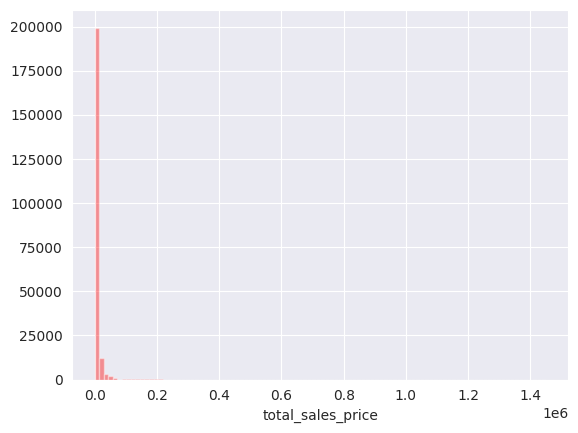

In [20]:
# set the background style of the plot
sns.set_style('darkgrid')

# Plotting Distribution plot for total_sales_price
sns.distplot(df['total_sales_price'], kde = False, color ='red', bins = 100)

In [21]:
# Display the Data type all the variables
df.dtypes

cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price                int64
dtype: object

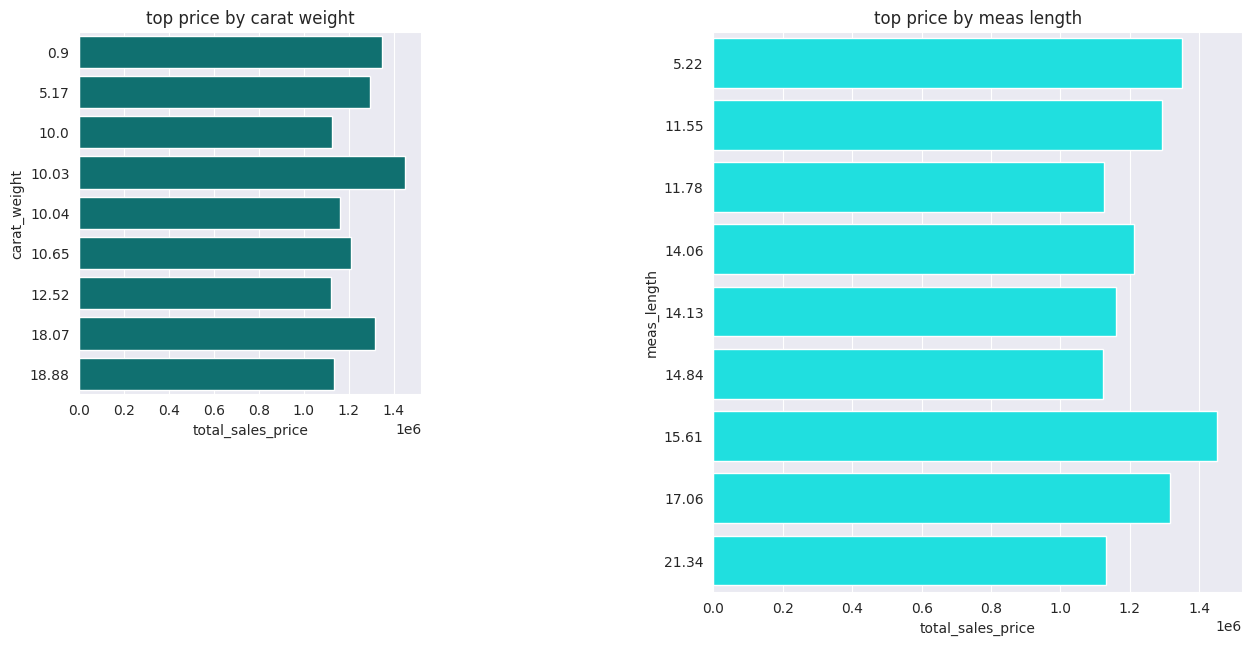

In [22]:
# Plotting Bar graphs for total_sales_price vs carat_weight and total_sales_price vs meas_length
plt.figure(figsize=(15, 16))
plt.subplot(3, 3, 1)
sns.barplot(top_price_by_carat_weight,x=df_y,y='carat_weight',color='teal',orient='h')
plt.title('top price by carat weight')
plt.subplot(2,2,2)
sns.barplot(top_price_by_meas_length,x=df_y,y='meas_length',color='cyan',orient='h')
plt.title('top price by meas length')
plt.show()

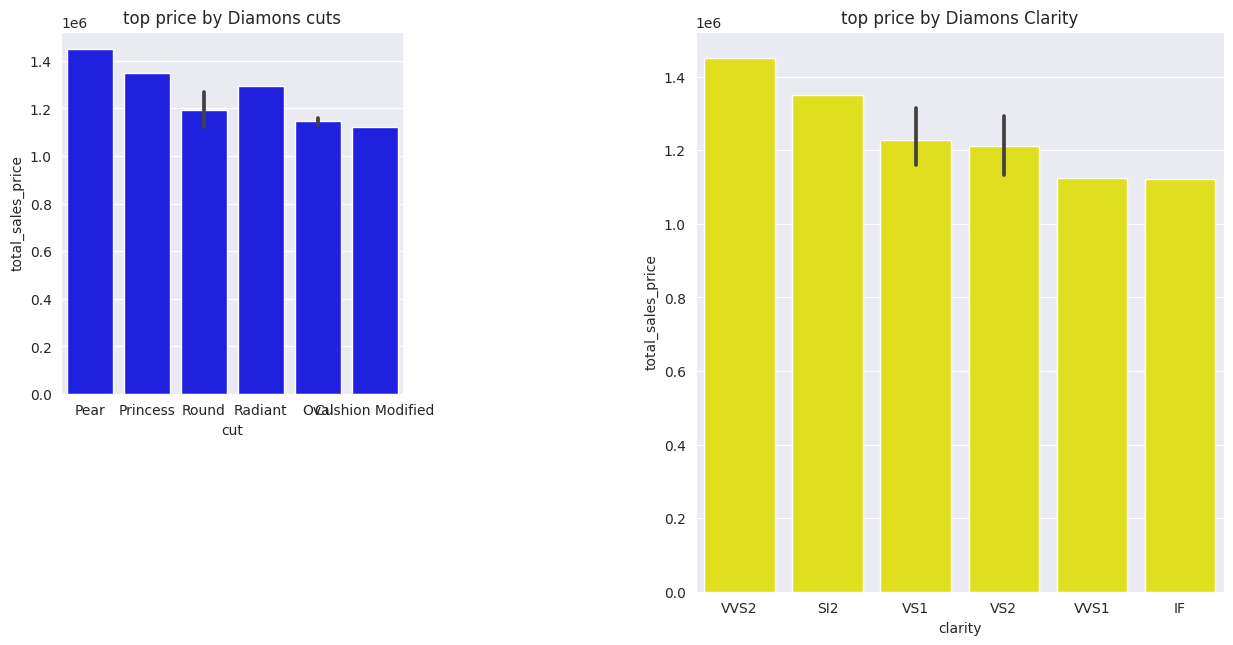

In [23]:
# Plotting Bar graphs for total_sales_price vs cut and total_sales_price vs clarity
plt.figure(figsize=(15, 16))
plt.subplot(3, 3, 1)
sns.barplot(top_price_by_cut,x='cut',y=df_y,color='blue',orient='v')
plt.title('top price by Diamons cuts')
plt.subplot(2,2,2)
sns.barplot(top_price_by_clarty,x='clarity',y=df_y,color='yellow',orient='v')
plt.title('top price by Diamons Clarity')
plt.show()

In [24]:
# droping our target variable from the main dataset
df.drop(columns=['total_sales_price'],inplace=True)

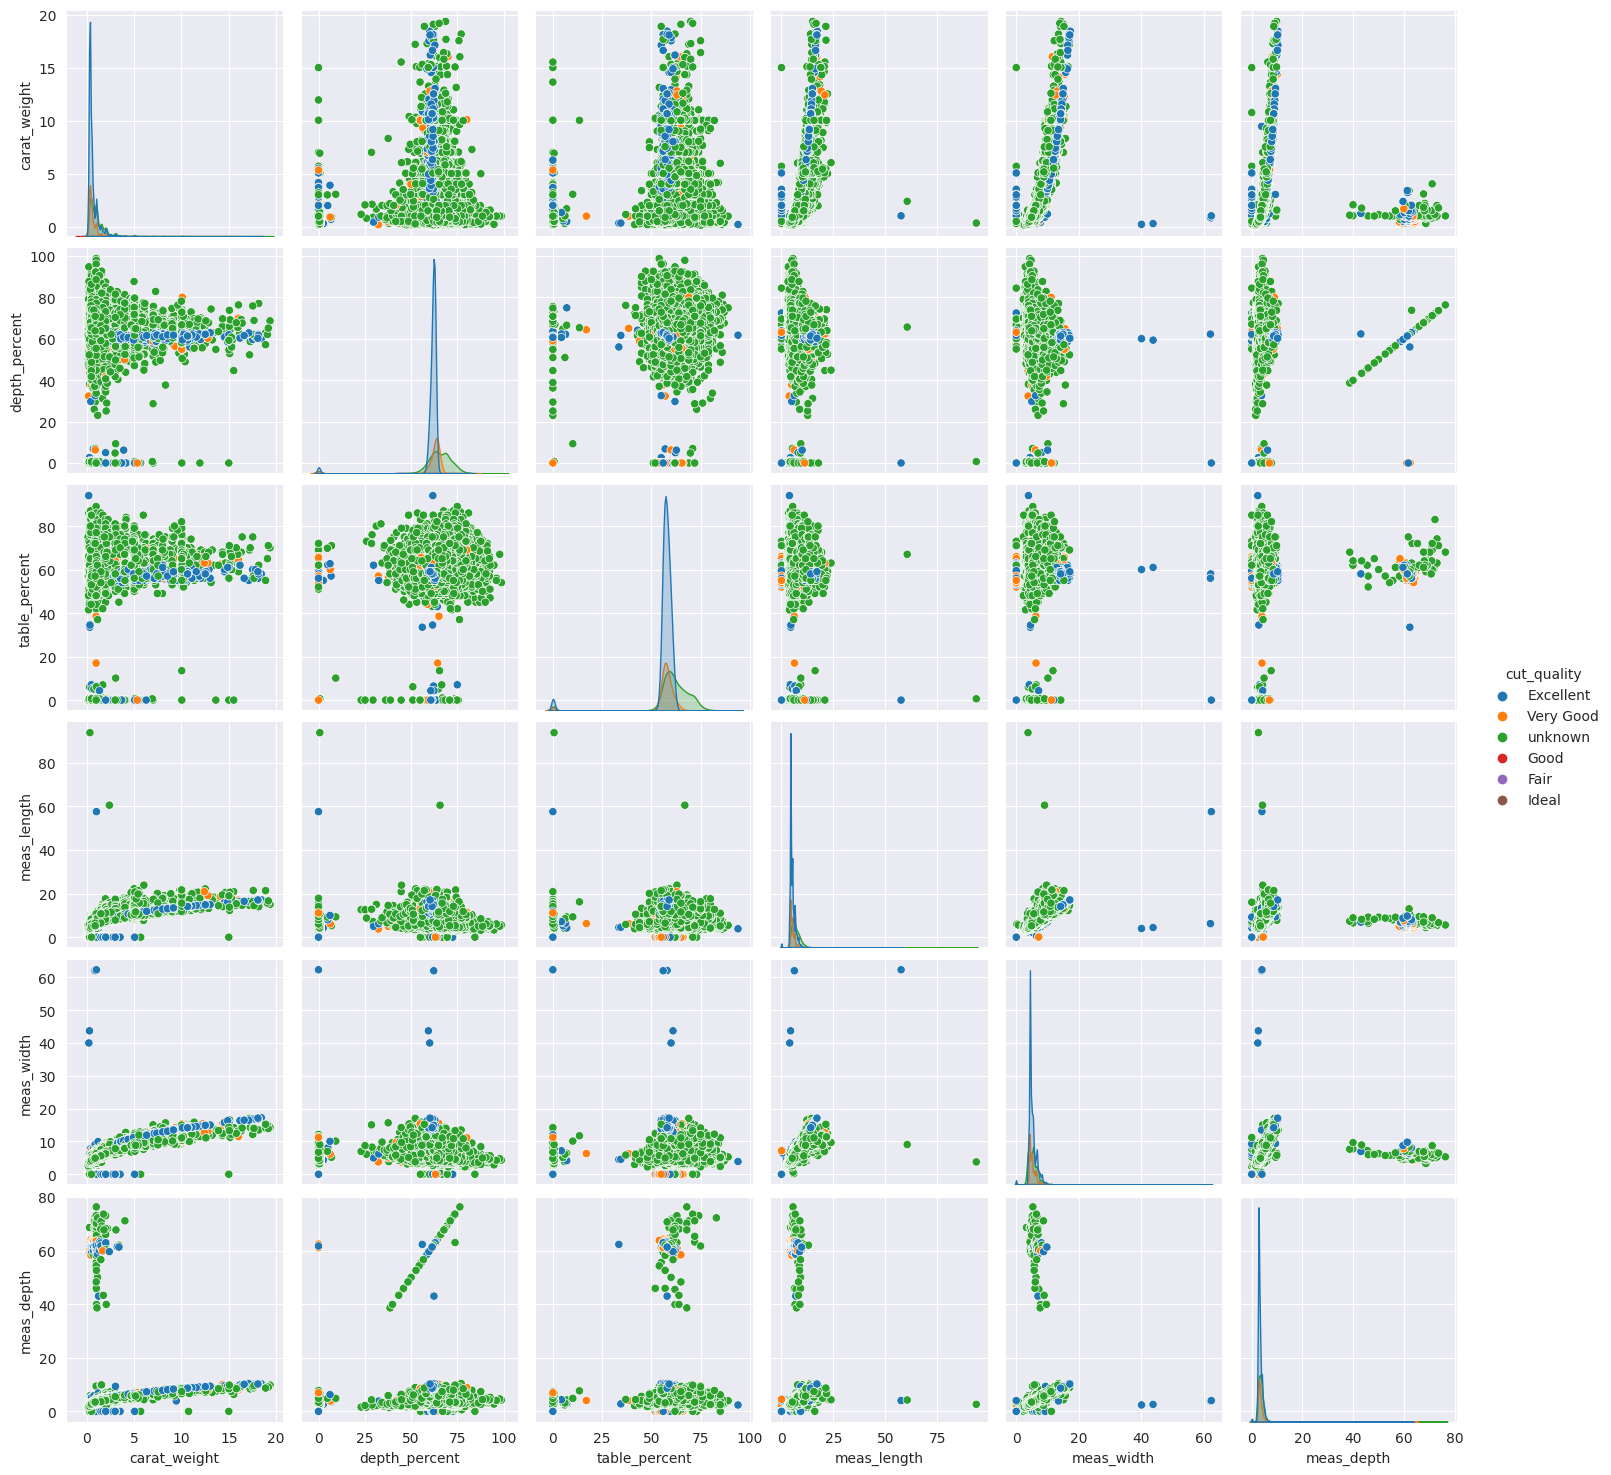

In [25]:
# To plot the pairwise plot of whole dataset
sns.pairplot(df, hue= "cut_quality" ) # using cut_quality as our hue to plot the graphs according to it

# Numarical variable exploration

In [26]:
#include all numerical cols
numarical_columns = df.select_dtypes(include=np.number).columns.tolist() # Selecting all the featues 
# having numarical data type and then use tolist to convert into an ordinery list
df_num = df[numarical_columns] # Converting them into a dataframe then
df_num.dtypes # printing the datatype of all the columns present in the df_num

carat_weight     float64
depth_percent    float64
table_percent    float64
meas_length      float64
meas_width       float64
meas_depth       float64
dtype: object

In [27]:
df_num.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.09,62.7,59.0,2.85,2.87,1.79
1,0.09,61.9,59.0,2.84,2.89,1.78
2,0.09,61.1,59.0,2.88,2.90,1.77
3,0.09,62.0,59.0,2.86,2.88,1.78
4,0.09,64.9,58.5,2.79,2.83,1.82


In [28]:
# number of unique values in each column
for col in df_num.columns: # Using for loop again to get column name one by one
    print(f'Numarical Column \033[1m{col}\033[0m has {len(df[col].unique())}') # Printing each numarical 
#   feature with its unique values

Numarical Column carat_weight has 878
Numarical Column depth_percent has 534
Numarical Column table_percent has 235
Numarical Column meas_length has 1415
Numarical Column meas_width has 1155
Numarical Column meas_depth has 852


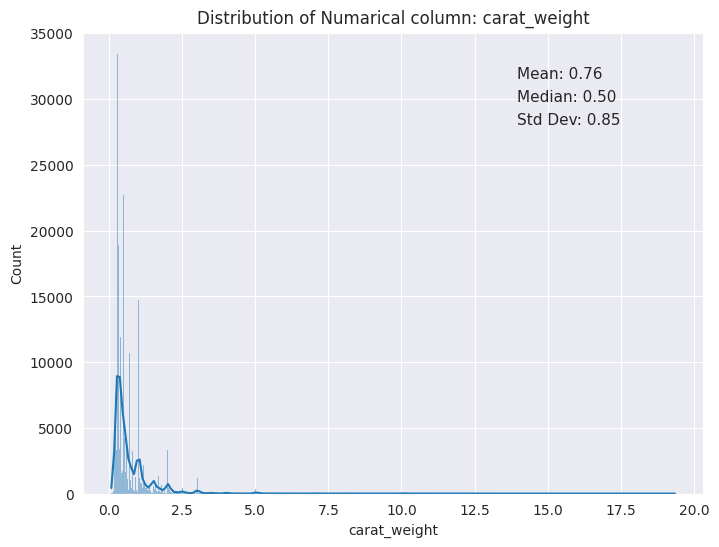

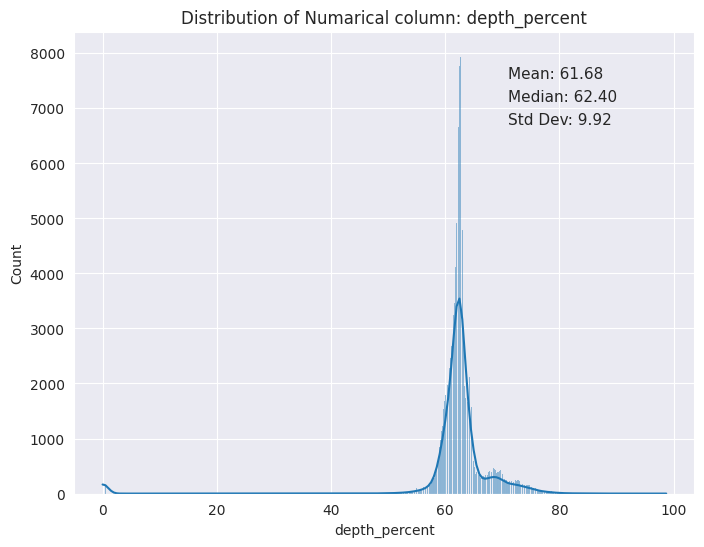

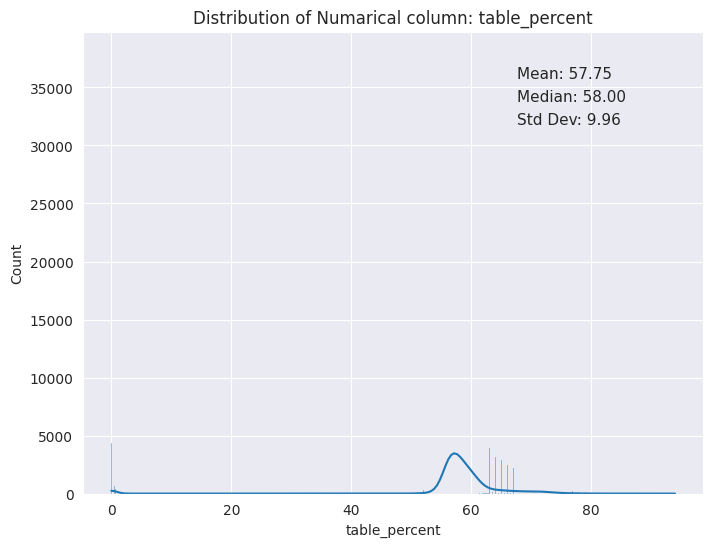

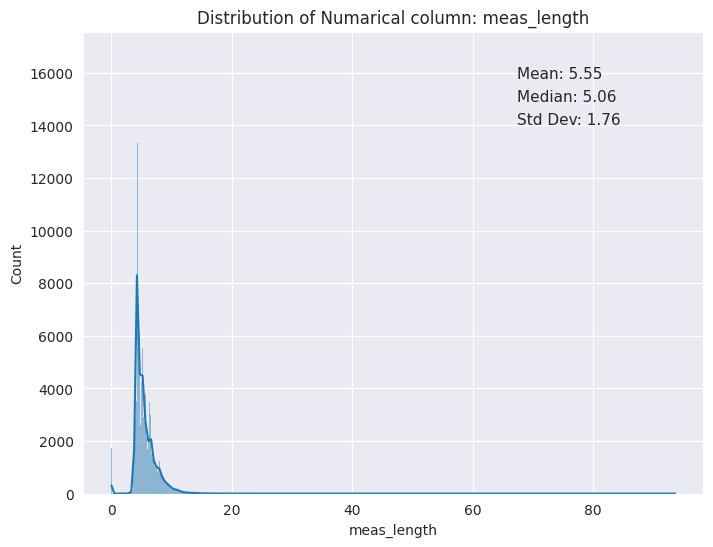

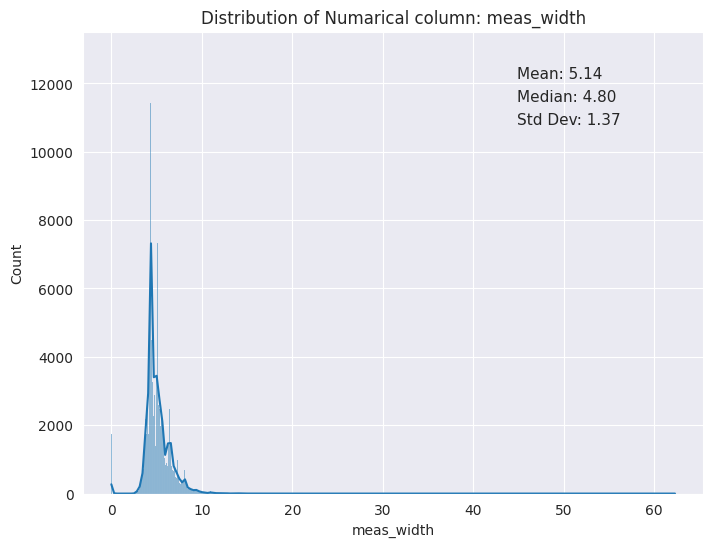

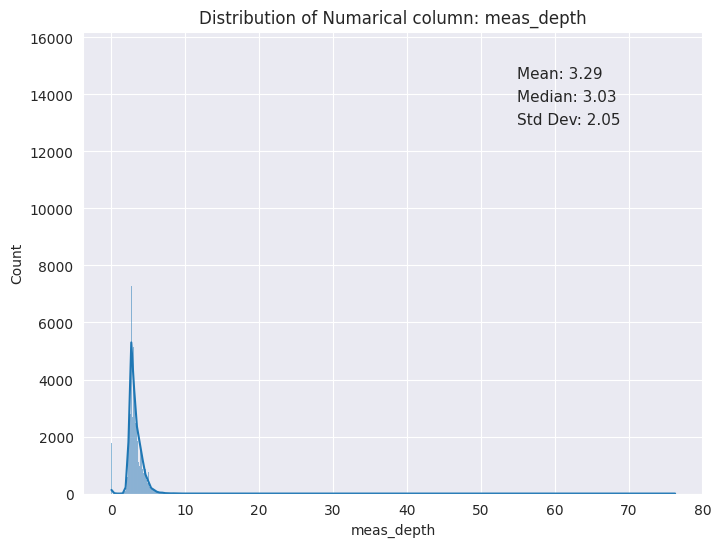

In [29]:
#  Visulizing the Histplot for all the numarical columns
for col in df_num.columns:
#     Giving a particular size to the graph figure
    plt.figure(figsize=(8,6))
    
#     Plotting the Histplot using Seaborn library and make kde = True
    sns.histplot(df[col],kde=True)
    
#     Perform the mean, median and Staandard deviation for each column and save into respective variable
    mean_val = df[col].mean()
    median_val = df[col].median()
    sd_val = df[col].std()
    
#     Add all three mean, median and SD to the graph using .text function of Matplotlib and
#     pass various perametes like font size , font family and Axes in it
    plt.text(0.7,0.9,f'Mean: {mean_val:.2f}',fontsize=11,fontfamily='cursive',transform=plt.gca().transAxes)
    plt.text(0.7,0.85,f'Median: {median_val:.2f}',fontsize=11,fontfamily='cursive',transform=plt.gca().transAxes)
    plt.text(0.7,0.8,f'Std Dev: {sd_val:.2f}',fontsize=11,fontfamily='cursive',transform=plt.gca().transAxes)
    
#     X lable the graph with Column name
    plt.xlabel(col)
#     Give a Title to our graph
    plt.title(f'Distribution of Numarical column: {col}')
    plt.show()

# Finding the correlation between variables

In [30]:
#pearson correlation
df_num.corr() # Using .corr() function to find the pearson correlation of all the numarical variables

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth
carat_weight,1.000000,0.061724,0.090697,0.782683,0.788912,0.350719
depth_percent,0.061724,1.000000,0.673835,0.128791,0.119692,0.086477
table_percent,0.090697,0.673835,1.000000,0.165742,0.141250,0.082533
meas_length,0.782683,0.128791,0.165742,1.000000,0.788652,0.342209
meas_width,0.788912,0.119692,0.141250,0.788652,1.000000,0.412933
meas_depth,0.350719,0.086477,0.082533,0.342209,0.412933,1.000000


<Axes: >

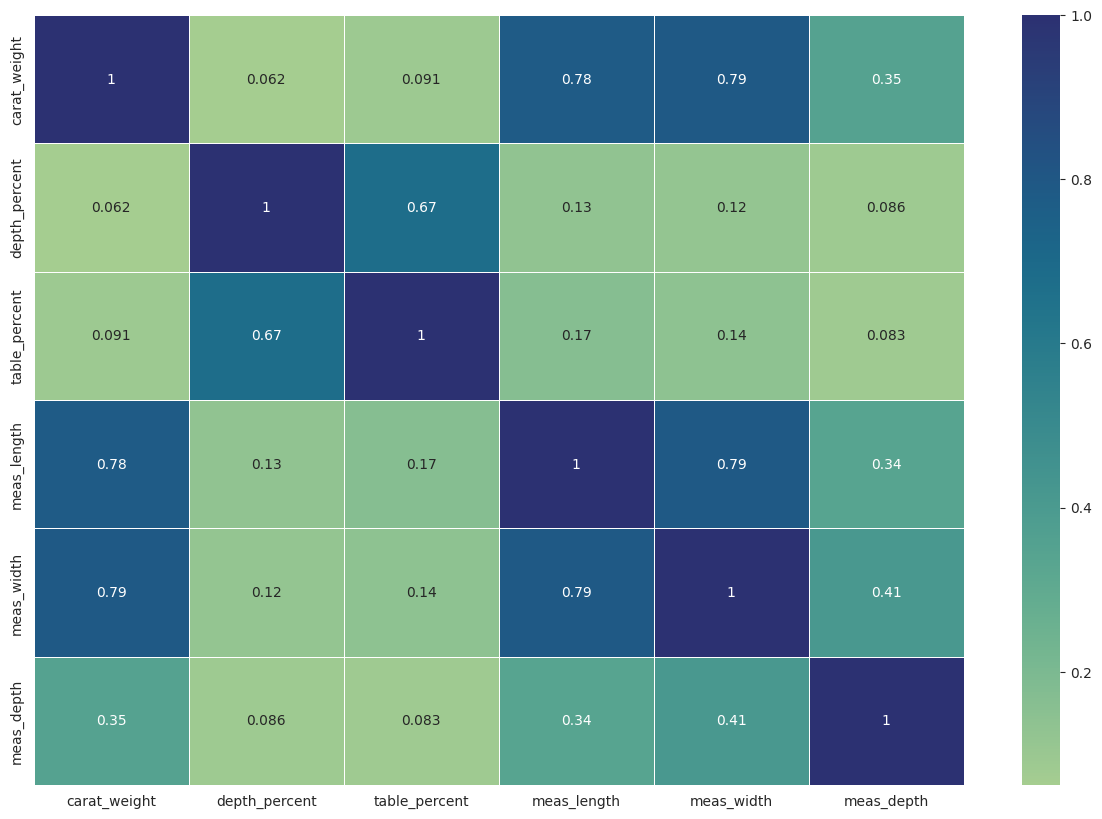

In [31]:
# heatmap
plt.figure(figsize=(15,10)) # Defining the graph size
sns.heatmap(df_num.corr(),annot=True,linewidth=.5,cmap='crest') # visulizing the above correlation 
# using heatmap using Seaborn library

# Categorical

In [32]:
# include all categorical cols
categorical_columns = df.select_dtypes(include=['object']).columns # Selecting all the featues having numarical data type

# Display the list of all categorical columns
print('Categorical Columns are: ', end='')
for col in categorical_columns:
    print(col,end=', ') # Printing all categorical in a line with ','

Categorical Columns are: cut, color, clarity, cut_quality, lab, symmetry, polish, eye_clean, culet_size, culet_condition, girdle_min, girdle_max, fluor_color, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity, 

In [33]:
#separating all categorical columns into another dataframe
df_cat = df[categorical_columns]

In [34]:
#no of unique vakues in each column
for col in categorical_columns:
    print(f'Total Unique Values in \033[1m{col}\033[0m are \033[1m{len(df_cat[col].unique())}\033[0m')

Total Unique Values in cut are 11
Total Unique Values in color are 11
Total Unique Values in clarity are 11
Total Unique Values in cut_quality are 6
Total Unique Values in lab are 3
Total Unique Values in symmetry are 5
Total Unique Values in polish are 5
Total Unique Values in eye_clean are 5
Total Unique Values in culet_size are 9
Total Unique Values in culet_condition are 4
Total Unique Values in girdle_min are 10
Total Unique Values in girdle_max are 10
Total Unique Values in fluor_color are 6
Total Unique Values in fancy_color_dominant_color are 13
Total Unique Values in fancy_color_secondary_color are 11
Total Unique Values in fancy_color_overtone are 9
Total Unique Values in fancy_color_intensity are 10


In [35]:
#  Displaying all the uniques values of all the columns
for col in categorical_columns:
    print(f'Unique Vales of Column {col} are: ')
    print(df_cat[col].unique(),'\n')

Unique Vales of Column cut are: 
['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher'] 

Unique Vales of Column color are: 
['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown'] 

Unique Vales of Column clarity are: 
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3'] 

Unique Vales of Column cut_quality are: 
['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal'] 

Unique Vales of Column lab are: 
['IGI' 'GIA' 'HRD'] 

Unique Vales of Column symmetry are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

Unique Vales of Column polish are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

Unique Vales of Column eye_clean are: 
['unknown' 'Yes' 'E1' 'Borderline' 'No'] 

Unique Vales of Column culet_size are: 
['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL'] 

Unique Vales of Column culet_condition are: 
['unknown' 'Abraded' 'Chipped' 'Pointed'] 

Unique Vales of Column girdle_min are: 
['M' 'STK' 'TN' 'TK' 'unknow

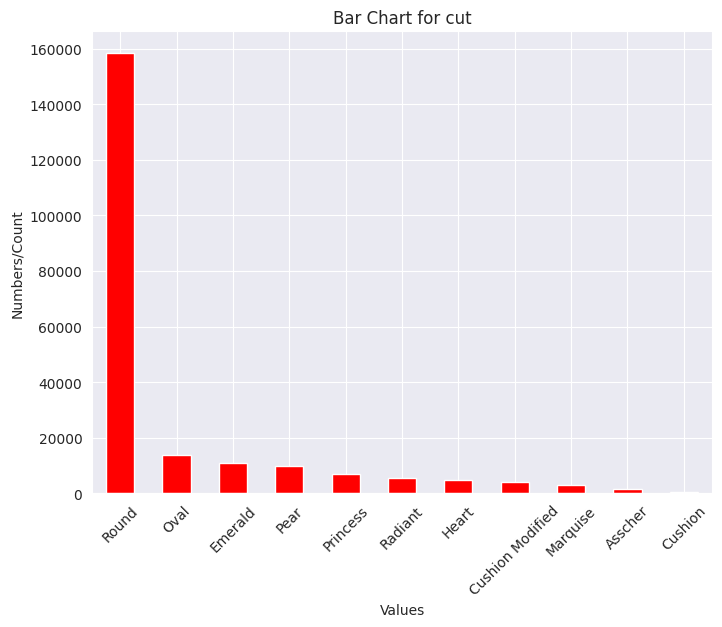

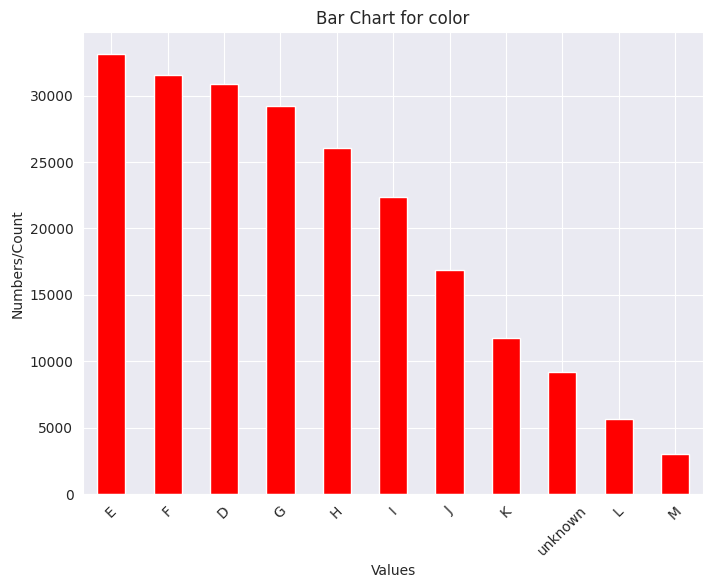

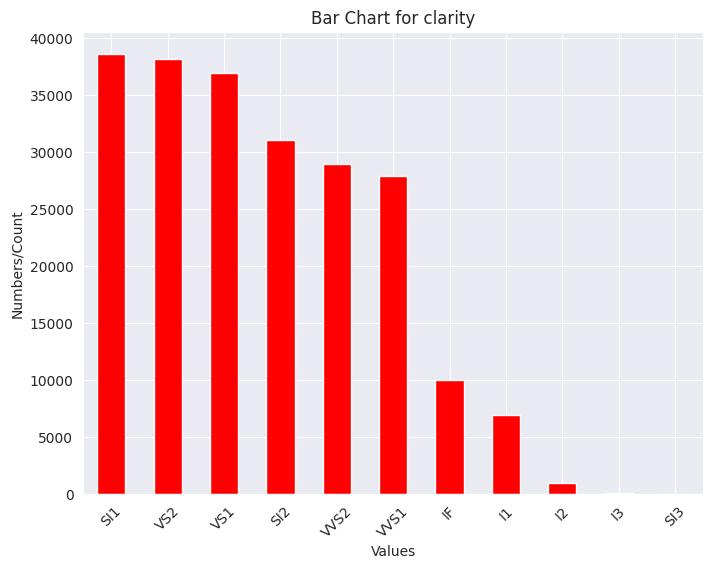

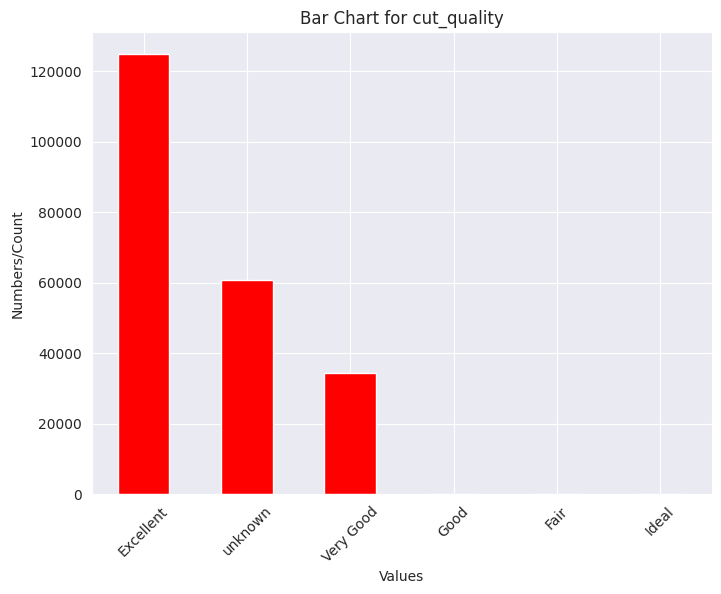

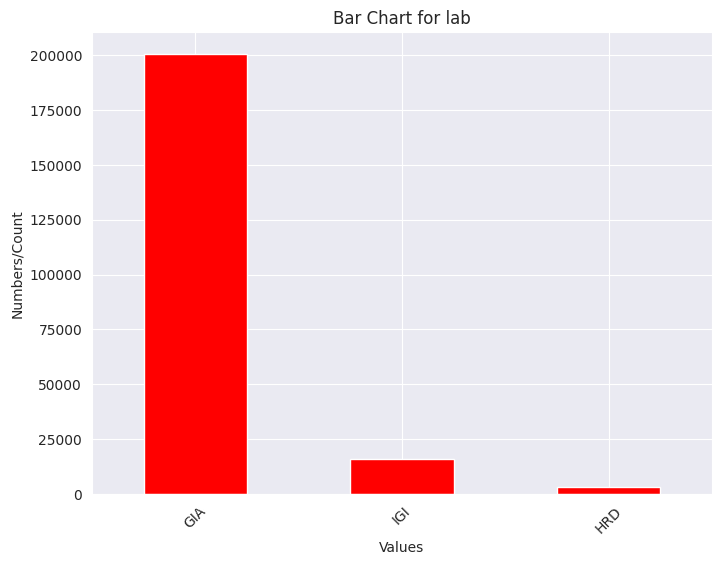

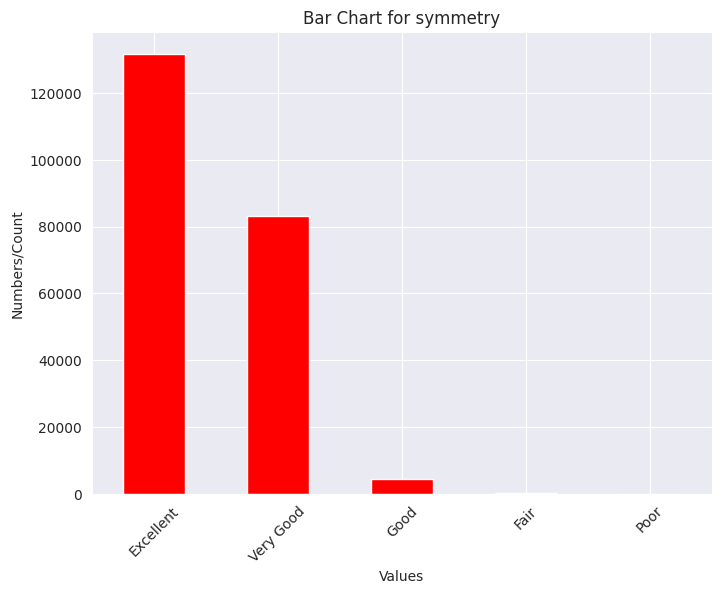

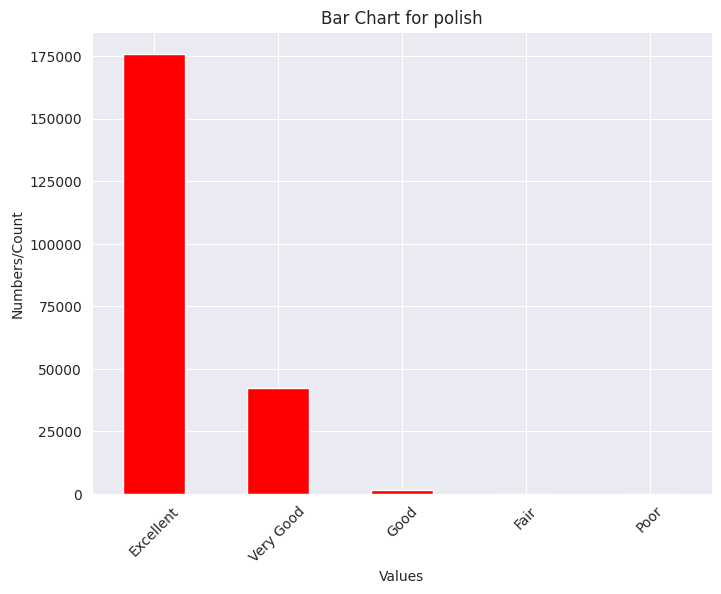

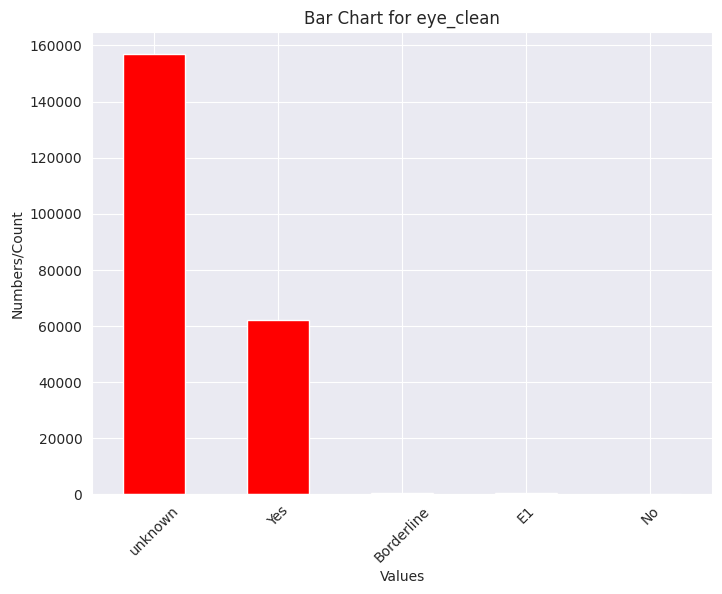

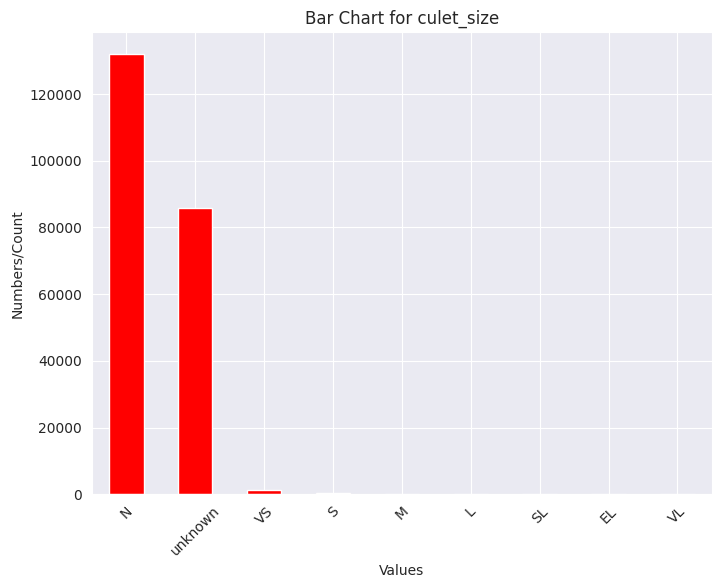

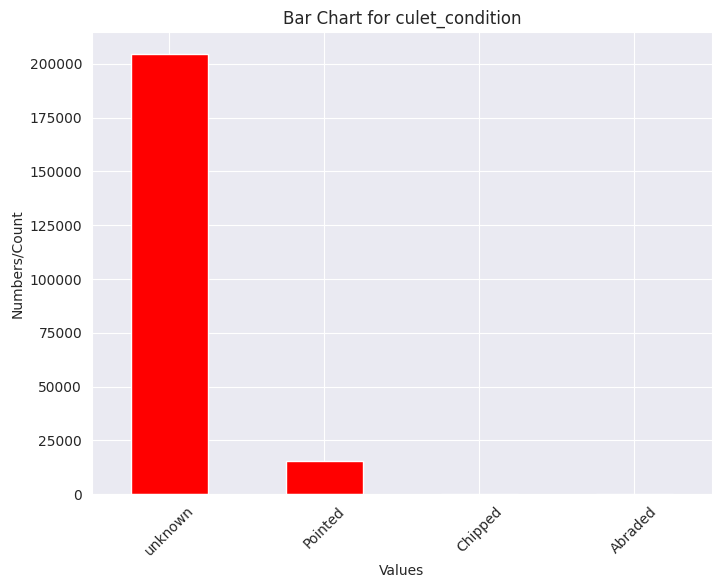

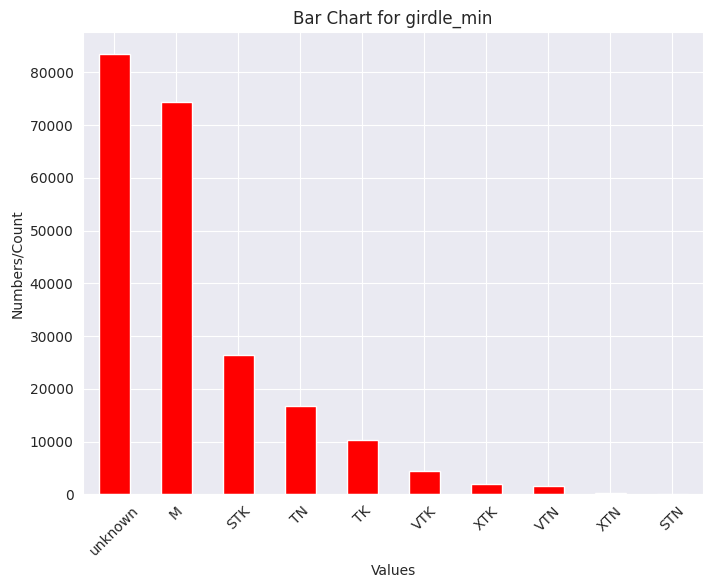

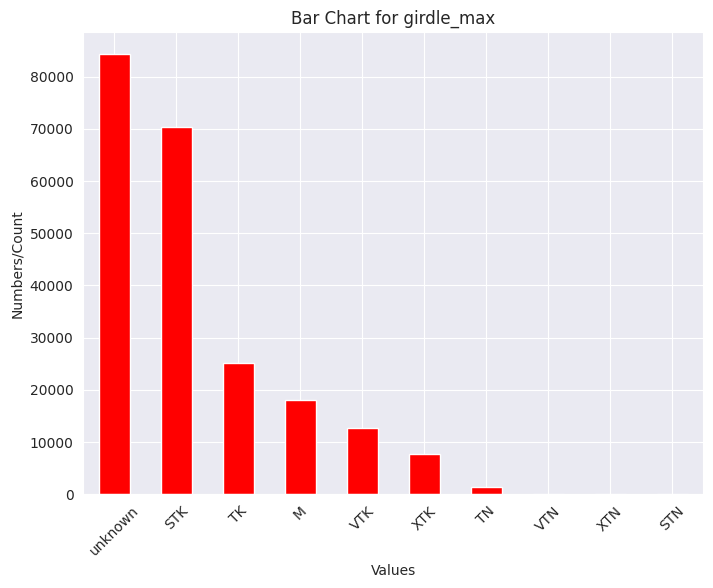

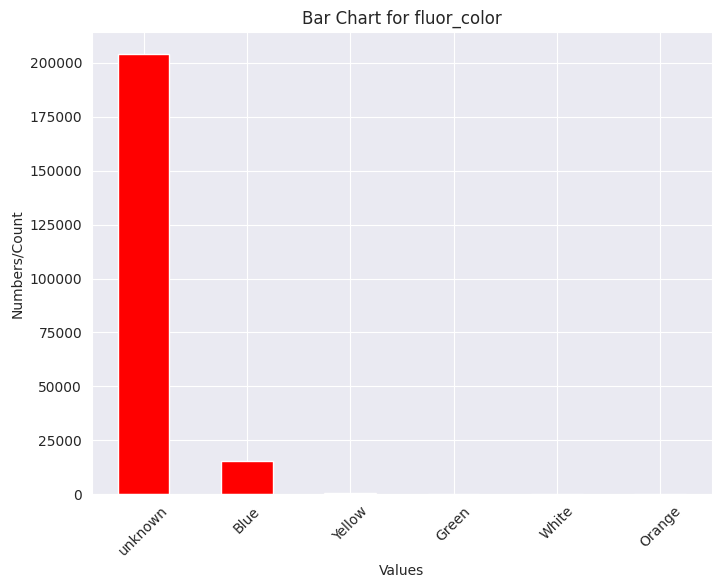

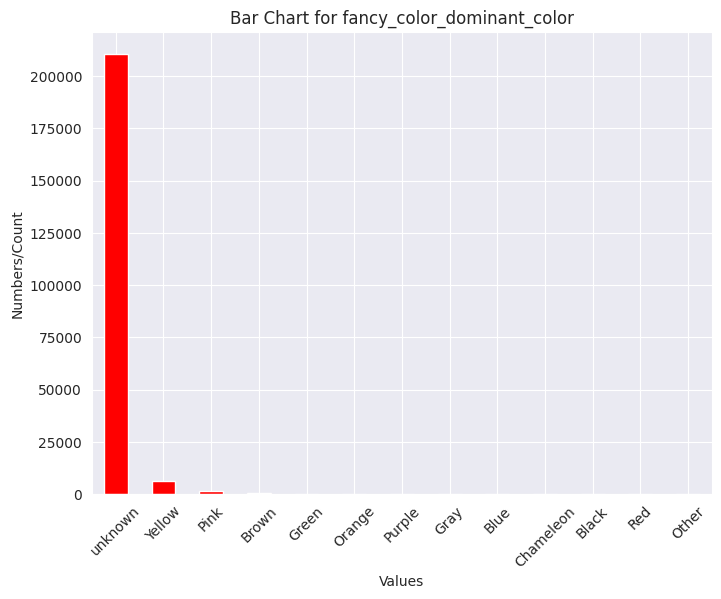

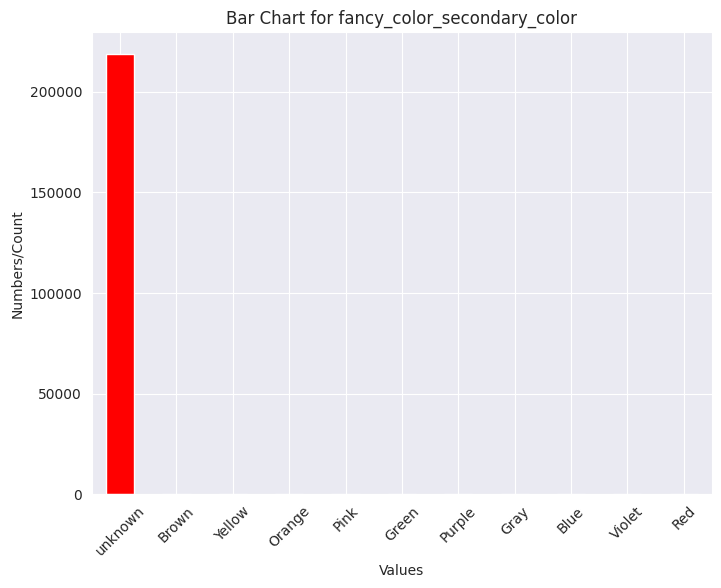

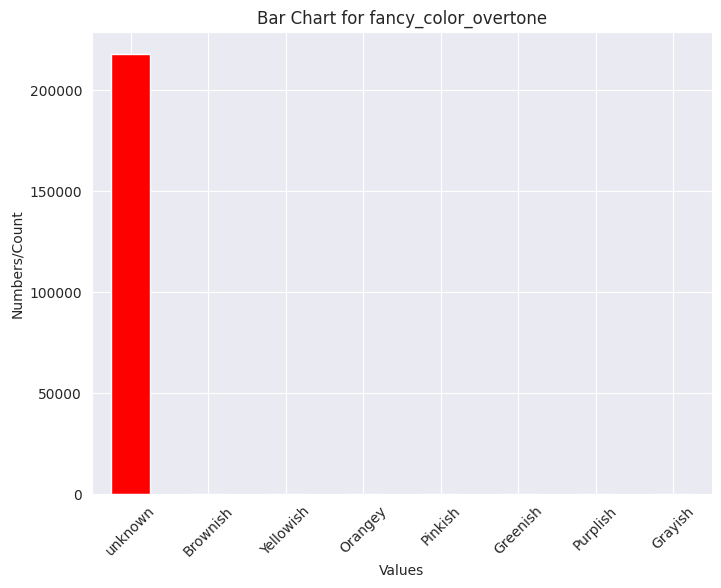

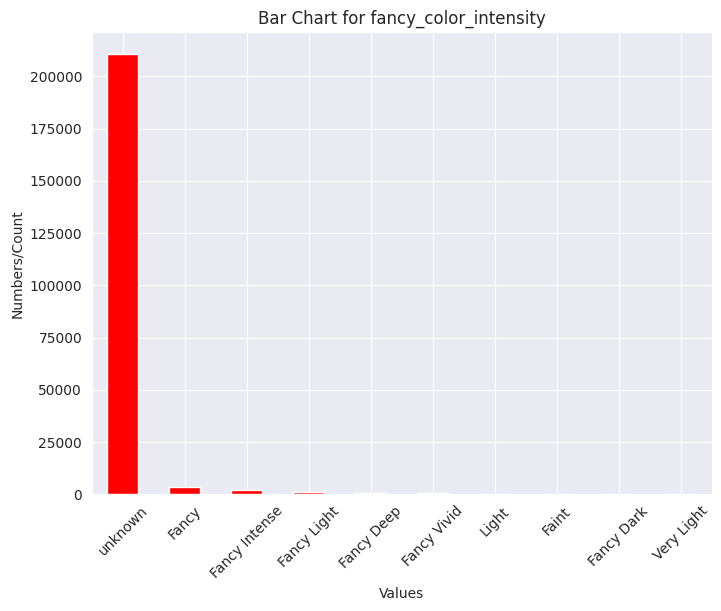

In [36]:
#  Visulizing all the value count of all column one by one
for col in categorical_columns:
    plt.figure(figsize=(8,6))  # giving a particular size to our graph figure
    df_cat[col].value_counts().plot(kind='bar',color = 'red')  # plotting bar chart in red color for each column 
    plt.title(f'Bar Chart for {col}') # .title to give a title to our chart
    plt.xlabel('Values')  # Giving label to X axis
    plt.ylabel('Numbers/Count') # Giving label to Y axis
    plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degree so that we can read it easily
    plt.show()

In [37]:
#  Checking if there is any null value in any categorical column
df_cat.isnull().sum()

cut                               0
color                             0
clarity                           0
cut_quality                       0
lab                               0
symmetry                          0
polish                            0
eye_clean                         0
culet_size                        0
culet_condition                   0
girdle_min                        0
girdle_max                        0
fluor_color                       0
fancy_color_dominant_color        0
fancy_color_secondary_color       0
fancy_color_overtone           1650
fancy_color_intensity             0
dtype: int64

***`'fancy_color_overtone'` has ~ 1.6k null values so dropping it is not a good option so we are filling that column's null values with the mode value of the column***

In [38]:
#  using pandas .fillna function to replace the null values with the mode of the column
df_cat['fancy_color_overtone'].fillna(df_cat['fancy_color_overtone'].mode()[0],inplace=True)

In [39]:
#  Printing the value count again for each categorical column
for col in categorical_columns:
    values = df_cat[col].value_counts()
    print(f'Value Counts for{col}')
    print(values)
    print()

Value Counts forcut
cut
Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: count, dtype: int64

Value Counts forcolor
color
E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: count, dtype: int64

Value Counts forclarity
clarity
SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: count, dtype: int64

Value Counts forcut_quality
cut_quality
Excellent    124861
unknown       60607
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: count, dtype: int64

Value Coun

# Normalizing values using standard scaling and one-hot encoding

***Using `Ordinal Encoding` on `cut_quality`, `polish`,`culet_size`,`culet_condition`, `symmetry`, `fancy_color_intensity` becasue these columns has odinal relation , for example: more fine the cutting quality more the price of dimond***

In [40]:
#  Creating a list of all columns having ordinal relation
categories = ['cut_quality','polish','culet_size','culet_condition','symmetry','fancy_color_intensity']

# making a new dataframe from all the odinal columns by using `.copy()` function of pandas
df_encoded = df_cat[categories].copy()

# Create OrdinalEncoder instance
encoder = OrdinalEncoder()

# Fit and transform the data
df_encoded[categories] = encoder.fit_transform(df_cat[categories])

#  Convering the datatype of all the variables to int
df_encoded = df_encoded.astype(int)

print(df_encoded)


        cut_quality  polish  culet_size  culet_condition  symmetry  \
0                 0       4           3                3         4   
1                 4       4           3                3         4   
2                 0       4           8                3         4   
3                 0       4           8                3         4   
4                 4       0           3                3         4   
...             ...     ...         ...              ...       ...   
219698            0       0           3                3         0   
219699            5       4           8                3         4   
219700            0       0           3                3         0   
219701            5       2           3                3         2   
219702            5       0           8                3         4   

        fancy_color_intensity  
0                           9  
1                           9  
2                           9  
3                           9  

In [41]:
#  removing all the ordinal relation columns from our main categorical column list
for col in categories:
    categorical_columns.tolist().remove(col) # Converting the categorical_columns Indes list to list first then remove column one by one
print(categorical_columns)

Index(['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish',
       'eye_clean', 'culet_size', 'culet_condition', 'girdle_min',
       'girdle_max', 'fluor_color', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity'],
      dtype='object')


## OneHot Encoding

In [42]:
# For encoding we are using pandas .get_dummies to make all other categorical columns to numarical columns
df_cat_dummy=pd.get_dummies(df_cat[categorical_columns], prefix=categorical_columns)

## Normalizing the `df_num` i.e all the numarical columns

In [43]:
#  Creating a variable to do standard scaler on our numarical featues of data

# Standardization is a scaling technique which makes the 
# data scale-free by converting the statistical distribution of the data

scaler = StandardScaler()

In [44]:
# making a new dataframe to do normalization by using `.copy()` function of pandas
df_norm = df_num.copy()

# Fitting df_norm to StandardScaler using fit_transform function, 
df_norm[df_norm.columns]=scaler.fit_transform(df_norm[df_norm.columns])

## Concatenating `Numerical` and `Categorical` columns (Encoded Columns)

In [45]:
#  Using .concate funtion again to concatenate our Independent Variables i.e numarical columns and Categorical column
complete_x_df=pd.concat([df_norm,df_cat_dummy,df_encoded],axis=1)

In [46]:
#  Displaying the top 5 rows of concated data dataframe
complete_x_df.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,...,fancy_color_intensity_Fancy Vivid,fancy_color_intensity_Light,fancy_color_intensity_Very Light,fancy_color_intensity_unknown,cut_quality,polish,culet_size,culet_condition,symmetry,fancy_color_intensity
0,-0.78636,0.102492,0.125746,-1.530031,-1.648296,-0.727899,False,False,False,False,...,False,False,False,True,0,4,3,3,4,9
1,-0.78636,0.021808,0.125746,-1.535701,-1.633745,-0.732765,False,False,False,False,...,False,False,False,True,4,4,3,3,4,9
2,-0.78636,-0.058876,0.125746,-1.513024,-1.626470,-0.737632,False,False,False,False,...,False,False,False,True,0,4,8,3,4,9
3,-0.78636,0.031894,0.125746,-1.524362,-1.641020,-0.732765,False,False,False,False,...,False,False,False,True,0,4,8,3,4,9
4,-0.78636,0.324373,0.075544,-1.564047,-1.677397,-0.713299,False,False,False,False,...,False,False,False,True,4,0,3,3,4,9


In [47]:
#  Checking the shape of new dataset
complete_x_df.shape

(219703, 150)

## Splitting the data into test and train subsets

In [48]:
#  Splitting our data into training and test data, in this we are using 40 percent of our data into testing and 60 percent into training
#  We are going to use sklearn's train_test_split module to splitting our data into test and train parts
X_train, X_test, y_train, y_test = train_test_split(complete_x_df, df_y, test_size=0.4, random_state=50)

In [49]:
#  Checking the shape of all X_train, X_test, y_train, y_test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((131821, 150), (87882, 150), (131821,), (87882,))

In [50]:
#  Displaying the head of X_train
X_train.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,...,fancy_color_intensity_Fancy Vivid,fancy_color_intensity_Light,fancy_color_intensity_Very Light,fancy_color_intensity_unknown,cut_quality,polish,culet_size,culet_condition,symmetry,fancy_color_intensity
44721,-0.597211,0.072235,-0.075059,-0.861067,-0.797093,-0.372636,False,False,False,False,...,False,False,False,True,0,0,8,3,0,9
179528,0.336714,0.001637,1.230174,0.828352,0.032283,-0.041706,False,False,False,True,...,False,False,False,True,5,4,3,3,4,9
141231,-0.301665,1.020271,-0.175462,-0.458554,-0.898947,-0.236371,False,False,False,False,...,False,False,False,False,5,0,3,3,4,0
177749,0.289427,-0.260585,0.226148,0.522216,1.007165,0.274624,False,False,False,False,...,False,False,False,True,0,0,8,3,0,9
120717,-0.171625,1.030356,1.230174,-0.486900,-0.331478,0.036160,False,False,False,False,...,False,False,False,True,5,4,3,3,4,9


# Build a machine-learning model

In [51]:
#  Before applying a perticular algorithm of our data we apply different types of regression models 
# to know which model is best fit to our data and so that we can fine tune it with diffrent hyperperameters 
model_testing = [KNeighborsRegressor(), SGDRegressor(), Lasso(), Ridge(),DecisionTreeRegressor(random_state=0)
          ,ElasticNet(random_state=0),LinearRegression(), XGBRegressor()]
# Fit each model one by one to get the r2 score as results
for model in model_testing:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    score = r2_score(y_test, ypred)
    print("model: {}  score {}".format(model, score))

model: KNeighborsRegressor()  score 0.7485332630285028
model: SGDRegressor()  score 0.6333259393414268
model: Lasso()  score 0.6414149686746193
model: Ridge()  score 0.6444962178255498
model: DecisionTreeRegressor(random_state=0)  score 0.7794200523508658
model: ElasticNet(random_state=0)  score 0.495642763060678
model: LinearRegression()  score -6891461280397239.0
model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
     

In [52]:
#  We are using our best model here to train our data and get best results 
# by adding hyperparametes for finetuning
xgb=XGBRegressor()

# Define the hyperparameter search space
hyperparameters = {
    'max_depth': [7, 9, 11,15,5,3],
    'learning_rate': [0.3, 0.4, 0.5,0.55,0.1,0.8],
    'n_estimators': [50,80,100, 250, 500, 1000,],
    'subsample': [0.1, 0.3, 0.5, 0.6, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.22, 0.3, 0.4, 0.6, 0.8],
    'reg_lambda': [0, 1, 2, 5, 7, 8, 10, 12]
}

# Create a scorer for the RandomizedSearchCV
scorer = make_scorer(r2_score)

# Perform a cross-validation technique

In [53]:
# Initialize RandomizedSearchCV
rs = RandomizedSearchCV(
    xgb,
    hyperparameters,
    n_iter=10,  # number of iterations
    scoring=scorer,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Perform the hyperparameter search
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8],
                                        'gamma': [0, 0.1, 0.22, 0.3, 0.4, 0.6,
                                                  0.8],
                                        'learning_rate': [0.3, 0.4, 0.5, 0.55,
                                                          0.1, 0.8],
                                        'max_depth': [7, 9, 11, 15, 5, 3],
                                        'n_estimators': [50, 80, 100, 250, 500,
                                                         1000],
                                        'reg_lambda': [0, 1, 2, 5, 7, 8, 10,
                                                       12],
                                        'subsample': [0.1, 0.3, 0.5, 0.6, 0.9]},
                   random_state=42, scoring=make_scorer(r2_score), verbose=1)

* ### Getting the best performing parameters for xgBoost

In [54]:
# best parameters
print(rs.best_params_)

{'subsample': 0.6, 'reg_lambda': 8, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.6, 'colsample_bytree': 0.7}


In [55]:
#  Printing the best score we get after performing finetune XGBoost
print(rs.best_score_)

0.8601102305974798


# Evaluation Score

* `MSE: ` $\frac{1}{n}$ $\sum_{i=1}^n (actual value - predicted value )^2$
       
      - Here N is the total number of observations/rows in the dataset. The sigma symbol denotes the difference between actual and predicted values taken on every i value ranging from 1 to n.
    
        
* `RMSE: ` is the square root of Mean Squared error. It measures the standard deviation of residuals.
    
   RMSE = $\sqrt{MSE}$ = $\sqrt{ \frac{1}{n} \sum_{i=1}^n (actual value - predicted value )^2}$

* `R2_Score:` R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.
    
     R2_Score = 1 - $\frac{SSr}{SSm}$
   
   where `SSr` is `Squared sum error of regression line` and `SSm` is `Squared sum error of mean line`
   

**referance - [https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/](http://)**

In [56]:
#  Showing thewe `MSE` , `RMSE` and `R2 Score` to get an idea how good our model perform
y_pred = rs.predict(X_test)
mse = MSE(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:",mse)
print("R2 Score:", r2)
print("RMSE:", rmse)

MSE: 70221845.81095307
R2 Score: 0.8933584076875953
RMSE: 8379.847600699733


# Utilization of Analysis Results for Diamond Price Prediction

## Pricing Strategy Optimization

* Insightful Pricing Decisions

    The analysis results provide us an in-depth understanding of the variables that influence the price of dimond and allow vendors to optimize there prices and set a competitive and dynamic pricing which align with market and customer preferences more.

* Real-time Adjustments

    Merchants may use the analysis result to implement the price adjustment models in real time which helps them to response quickly to maket sentiments and give best price to there customers.

## Risk Management

* Risk Mitigation

    Stakeholders can implement risk management methods based on the insights provided by the model,and  reducing the impact of those prices in market changes.

## Market Intelligence

* Enhanced Decision-Making

    Industries use this analysis results as a foundation for their decision-making for example which is the best price to enter into new markets or expanding the new product range.